<a href="https://colab.research.google.com/github/johntango/Python100/blob/master/Predict_House_PricesPart_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv'
# R^2 = 0.75  Percentage of the Price explained by the indep. variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X\beta + e $$

In [ ]:
data = pd.read_csv('houseSmallData.csv')
train = data.iloc[0:100,:]
train.shape
train
train.shape

(100, 82)

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

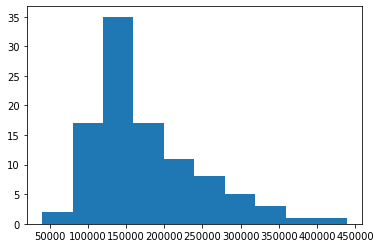

In [ ]:
salePrice = train['SalePrice']
salePrice.describe()
plt.hist(salePrice)

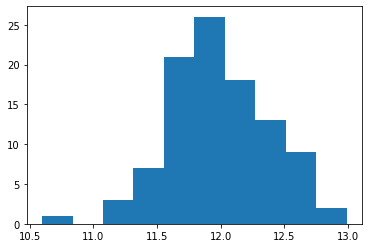

In [ ]:
plt.hist(np.log(salePrice))
np.log(salePrice).skew()
target = np.log(salePrice)

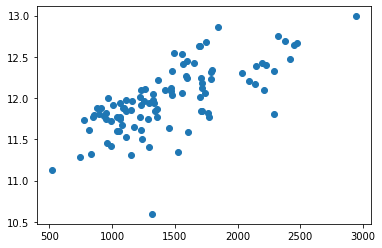

In [ ]:
plt.scatter(train['GrLivArea'],y=target)

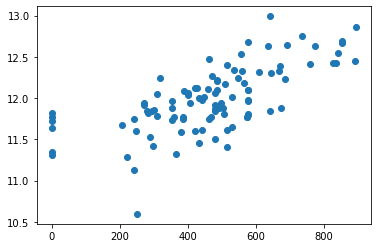

In [ ]:
plt.scatter(train['GarageArea'],y=target)

In [ ]:
nulls = train.isnull().sum().sort_values(ascending=False)[0:20]
type(nulls)
data = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data.isnull().sum() != 0)
data.shape

(100, 39)

In [ ]:
numeric = data.select_dtypes(include=[np.number])
numeric.head()
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[:5]
cols




SalePrice      1.000000
OverallQual    0.855061
GrLivArea      0.735129
GarageArea     0.688249
GarageCars     0.663441
Name: SalePrice, dtype: float64

In [ ]:
X = data[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt
0,7,1710,548,2,2003
1,6,1262,460,2,1976
2,7,1786,608,2,2001
3,7,1717,642,3,1915
4,8,2198,836,3,2000
...,...,...,...,...,...
95,6,1470,420,2,1993
96,7,1588,472,2,1999
97,4,960,432,1,1965
98,5,835,366,1,1920


In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.8309859964337734


0     208500
1     181500
2     223500
3     140000
4     250000
       ...  
95    185000
96    214000
97     94750
98     83000
99    128950
Name: SalePrice, Length: 100, dtype: int64

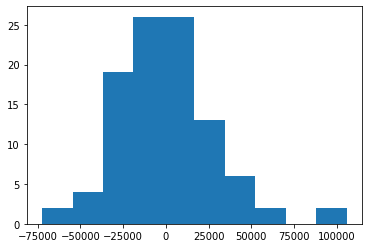

In [ ]:
plt.hist(Y - predictions)

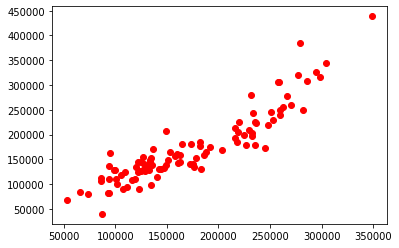

In [ ]:
plt.scatter(predictions, Y, color = 'r')

In [ ]:
train[['SalePrice', 'OverallQual', 'MasVnrArea']]

,SalePrice,OverallQual,MasVnrArea
0,208500,7,196.0
1,181500,6,0.0
2,223500,7,162.0
3,140000,7,0.0
4,250000,8,350.0
5,143000,5,0.0
6,307000,8,186.0
7,200000,7,240.0
8,129900,7,0.0
9,118000,5,0.0


### Interpolate Missing Data 

In [ ]:
data = pd.read_csv('houseSmallData.csv')
train = data.iloc[0:100,:]
numeric = train.select_dtypes(include=[np.number])
numeric.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,61,0,0,0,0,NaN,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,0,0,0,0,0,NaN,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,42,0,0,0,0,NaN,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,35,272,0,0,0,NaN,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,84,0,0,0,0,NaN,0,12,2008,250000


In [ ]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[:3]
cols

SalePrice      1.000000
OverallQual    0.855061
GrLivArea      0.735129
Name: SalePrice, dtype: float64